In [439]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from matplotlib.pylab import plot, arange, show
from pylab import *

En premier lieu on doit estimer w, le min de la fonction F

# Initialisation de tous les éléments

In [704]:
n=50 #taille de A=50
d=2 #taille du vecteur w
A_0 = np.linspace(1,25,25)
A_1 = np.linspace(26,50,25) # A_0 et A_1 sont disjoints
A = np.linspace(1,n,n)

In [676]:
#Construction matrice de jeu de données (chaque ligne est un point x_a)
X =np.eye(n,d)
for i in range(n):
    X[i]=np.random.rand(d)

### Définiton fonction

In [724]:
#Définition fonction sigma
def sigma(t):
    return exp(t)/(1+exp(t))

In [725]:
#Définition fonction f_a_w
def f(a,w):
    t=np.vdot(w,X[a])
    if a < 25: #si a appartient à A_0
        return -log(1-sigma(t))
    else:
        return -log(sigma(t))

In [726]:
#Définition somme fonction f_a_w
def s_f(w):
    s=0
    for i in range(n):
        s=s+f(i,w)
    return s

In [727]:
#Définition fonction F(w)
def F(w):
    return s_f(w) + (g/2)*(np.linalg.norm(w)**2) # g = gamma

### Définition gradient

In [728]:
#Définition gradient fonction f_a_w
def grad_f(a,w):
    t=np.vdot(w,X[a])
    if a < 25: #si a appartient à A_0
        y_a=0
    else:
        y_a=1
    return (t-y_a)*X[a]

In [729]:
#Définition somme gradient fonction f_a_w
def grad_s_f(w):
    s=0
    for i in range(n):
        s=s+grad_f(i,w)
    return s

In [730]:
#Définition gradient fonction F(w)
def grad_F(w):
    return grad_s_f(w) + g*w

### Définition matrice Hessienne 

In [731]:
#Définition hessienne fonction f_a_w
def h_f(a,w):
    t=np.vdot(w,X[a])
    return t*(1-t)*np.vdot(X[a],np.transpose(X[a]))

In [732]:
# problème dans la multiplication du vecteur X[a] et X[a]^t

In [733]:
#Définition somme hessienne fonction f_a_w
def h_s_f(w):
    s=0
    for i in range(n):
        s=s+h_f(i,w)
    return s

In [734]:
#Définition Hessienne fonction F(w)
def h_F(w):
    I=np.eye(d) #matrice identité_d
    return h_s_f(w) + g*I

## Etude du problème régularisé gamma>0

In [735]:
g=2 #on choisit gamma

### Descente du gradient à pas optimal

In [736]:
# Paramètres
tol = 1e-5; it_max = 1e2; t = 0.1; c1 = 1e-3;

# Initialisation
alpha = 1/2
w = np.ones(shape=d)
d_d = -grad_F(w)
it = 0

# Pas d'Armijo
while F(w+alpha*d_d) <= F(w) + c1*alpha*np.vdot(grad_F(w),d_d):
    alpha = t*alpha
alpha_k = alpha

# Boucle
while np.linalg.norm(grad_F(w)) > tol and it < it_max:
    w = w + alpha_k*d_d
    d_d = -grad_F(w)
    it = it + 1 
# Fin

print(w)
print(grad_F(w))
F(w)

[4.82991609e+113 4.83061014e+113]
[1.42966622e+115 1.42987166e+115]


C:\Users\Alexandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [737]:
# A un moment il y a une division par zéro, OU?
# Pourquoi F(w) tend vers infini ? 
# Pour grad_F ne tend pas vers 0?

### Méthode de Newton

In [738]:
# Paramètres
tol = 1e-5; it_max = 1e2;

# Initialisation
w = np.zeros(shape=d)
d_d = -linalg.inv(h_F(w))*grad_F(w) # descente de la méthode de Newton
it = 0

# Boucle
while np.linalg.norm(grad_F(w)) > tol and it < it_max:
    w = w + d_d
    d_d= -linalg.inv(h_F(w))*grad_F(w)
    it = it + 1 
# Fin

print(w)
print(grad_F(w))

ValueError: cannot reshape array of size 2 into shape (4,)

In [739]:
# A refaire car PROBLEME DANS DEFINITION HESSIENNE de petit f

## Etude du problème non régularisé

In [740]:
g=0 #gamma = 0

### Descente de gradient pas d'Armijo

In [741]:
# Paramètres
tol = 1e-5; it_max = 1e2; t = 0.1; c1 = 1e-3;

# Initialisation
alpha = 1/2
w = np.zeros(shape=d)
d_d = -grad_F(w)
it = 0

# Pas d'Armijo
while F(w+alpha*d_d) <= F(w) + c1*alpha*np.vdot(grad_F(w),d_d):
    alpha = t*alpha
alpha_k = alpha

# Boucle
while np.linalg.norm(d_d) > tol and it < it_max:
    w = w + alpha_k*d_d
    d_d = -grad_F(w)
    it = it + 1 
# Fin

print(w)
print(grad_F(w))

[-2.8441344e+110 -2.8445431e+110]
[-7.84987604e+111 -7.85100406e+111]


### Méthode de Newton 

In [742]:
# A FAIRE 

Une fois w trouvé, on peut utiliser u=u_w pour estimer la catégorie de points ne faisant pas partie du jeu de données
u = u_w = sigma(w,x) 

In [743]:
w_min=w #on a trouvé le min de F

In [744]:
def u_w(x):
    t=np.vdot(w_min,x)
    return sigma(t)

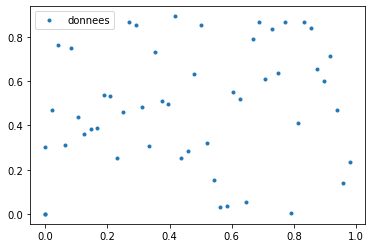

In [745]:
plt.plot(X[:,0],X[:,1],'.',label='donnees')
plt.legend()
plt.show()

In [746]:
#Construction matrice de jeu de données (on prend d=2)
d=2
W =np.eye(25,d) #points qui sont dans A_0
W[:,0] = np.linspace(0,0.5,25)
W[:,1] = np.random.rand(25)
    

Y =np.eye(25,d) #points qui sont dans A_1
Y[:,0] = np.linspace(0.5,1,25)
Y[:,1] = np.random.rand(25)

X=np.eye(n,d) #matrice complète des jeux de données
for i in range(24):
    X[i]=W[i]
for i in range(24):
    X[25+i]=Y[i]

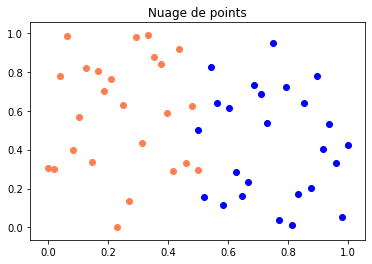

In [747]:
plt.scatter(W[:,0], W[:,1], c='coral', label='Points dans A_0')
plt.scatter(Y[:,0], Y[:,1], c='blue', label='Points dans A_1')
plt.title('Nuage de points')
plt.show()

In [702]:
x=np.random.rand(d)

In [703]:
u_w(x)

0.0